# GPU Puzzles
- by [Sasha Rush](http://rush-nlp.com) - [srush_nlp](https://twitter.com/srush_nlp)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/srush/GPU-Puzzles/blob/main/GPU_puzzlers.ipynb)

![](https://github.com/srush/GPU-Puzzles/raw/main/cuda.png)

GPU architectures are critical to machine learning, and seem to be
becoming even more important every day.  This notebook is an attempt
teach GPU programming in a completely interactive fashion by having
you solve puzzles on your own. Instead of providing a
textual guide that tries to explain the concepts, it throws you
right in to coding and building GPU kernels. In a few hours, I think
you can go from basics to understanding the key algorithms.

(If you are into this style of teaching, also check out my [Tensor
Puzzles](https://github.com/srush/Tensor-Puzzles) for PyTorch.)

In [1]:
!pip install -qqq git+https://github.com/danoneata/chalk@srush-patch-1
!wget -q https://github.com/srush/GPU-Puzzles/raw/main/robot.png https://github.com/srush/GPU-Puzzles/raw/main/lib.py

In [2]:
import numba
import numpy as np
import warnings
from lib import CudaProblem, Coord

In [3]:
warnings.filterwarnings(
    action="ignore", category=numba.NumbaPerformanceWarning, module="numba"
)

## Puzzle 1: Map

Implement a "kernel" (GPU function) that adds 10 to each position of vector `a`
and stores it in vector `out`.  You have 1 thread per position.

*Tip: Think of the function `call` as being run 1 time for each thread.
The only difference is that `cuda.threadIdx.x` changes each time.*

In [4]:
def map_spec(a):
    return a + 10

In [5]:
def map_test(cuda):
    def call(out, a) -> None:
        local_i = cuda.threadIdx.x
        # FILL ME IN (roughly 1 lines)

    return call

# Map
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             0 |             0 |             0 |             0 | 



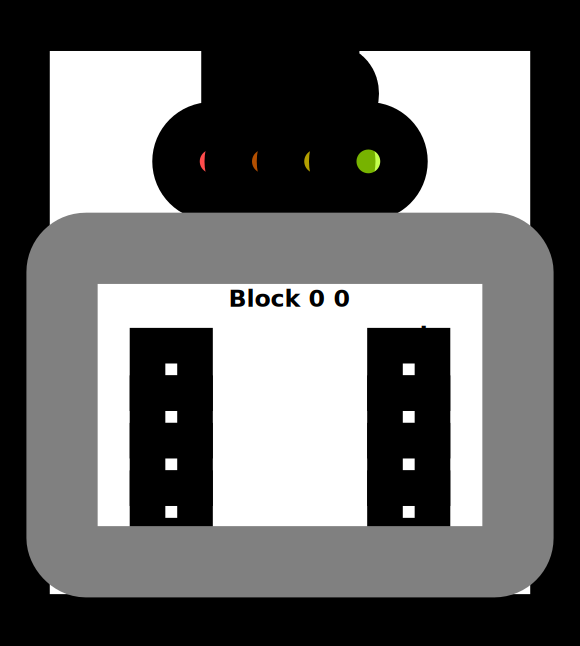

In [6]:
SIZE = 4
out = np.zeros((SIZE,))
a = np.arange(SIZE)
problem = CudaProblem(
    "Map", map_test, [a], out, threadsperblock=Coord(SIZE, 1), spec=map_spec
)
problem.show()

In [7]:
problem.check()

Failed Tests.
Yours: [0. 0. 0. 0.]
Spec : [10 11 12 13]


## Puzzle 2 - Zip

Implement a kernel that adds together each position of `a` and `b` and stores it in `out`.
You have 1 thread per position.

In [8]:
def zip_spec(a, b):
    return a + b

In [9]:
def zip_test(cuda):
    def call(out, a, b) -> None:
        local_i = cuda.threadIdx.x
        # FILL ME IN (roughly 1 lines)

    return call

# Zip
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             0 |             0 |             0 |             0 | 



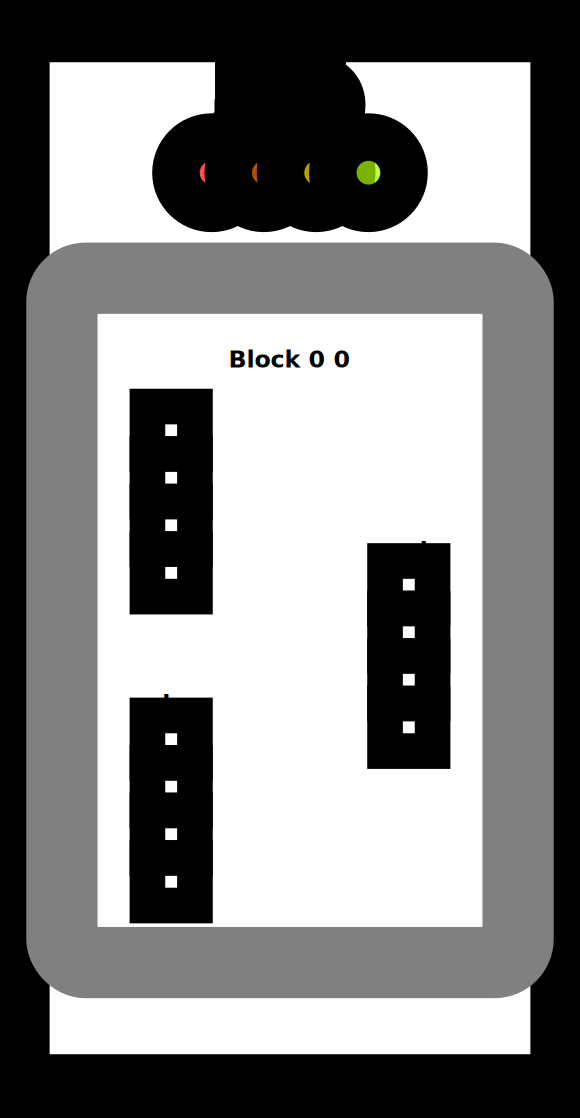

In [10]:
SIZE = 4
out = np.zeros((SIZE,))
a = np.arange(SIZE)
b = np.arange(SIZE)
problem = CudaProblem(
    "Zip", zip_test, [a, b], out, threadsperblock=Coord(SIZE, 1), spec=zip_spec
)
problem.show()

In [11]:
problem.check()

Failed Tests.
Yours: [0. 0. 0. 0.]
Spec : [0 2 4 6]


## Puzzle 3 - Guards

Implement a kernel that adds 10 to each position of `a` and stores it in `out`.
You have more threads than positions.

In [12]:
def map_guard_test(cuda):
    def call(out, a, size) -> None:
        local_i = cuda.threadIdx.x
        # FILL ME IN (roughly 2 lines)

    return call

# Guard
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             0 |             0 |             0 |             0 | 



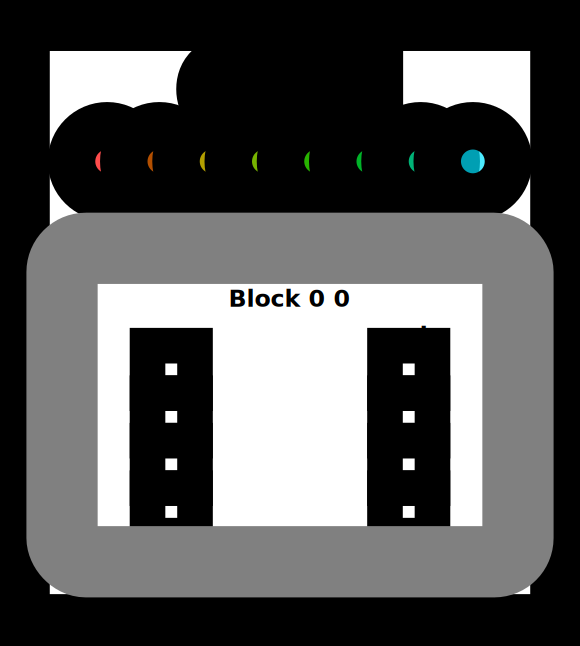

In [13]:
SIZE = 4
out = np.zeros((SIZE,))
a = np.arange(SIZE)
problem = CudaProblem(
    "Guard",
    map_guard_test,
    [a],
    out,
    [SIZE],
    threadsperblock=Coord(8, 1),
    spec=map_spec,
)
problem.show()

In [14]:
problem.check()

Failed Tests.
Yours: [0. 0. 0. 0.]
Spec : [10 11 12 13]


## Puzzle 4 - Map 2D

Implement a kernel that adds 10 to each position of `a` and stores it in `out`.
Input `a` is 2D and square. You have more threads than positions.

In [15]:
def map_2D_test(cuda):
    def call(out, a, size) -> None:
        local_i = cuda.threadIdx.x
        local_j = cuda.threadIdx.y
        # FILL ME IN (roughly 2 lines)

    return call

# Map 2D
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             0 |             0 |             0 |             0 | 



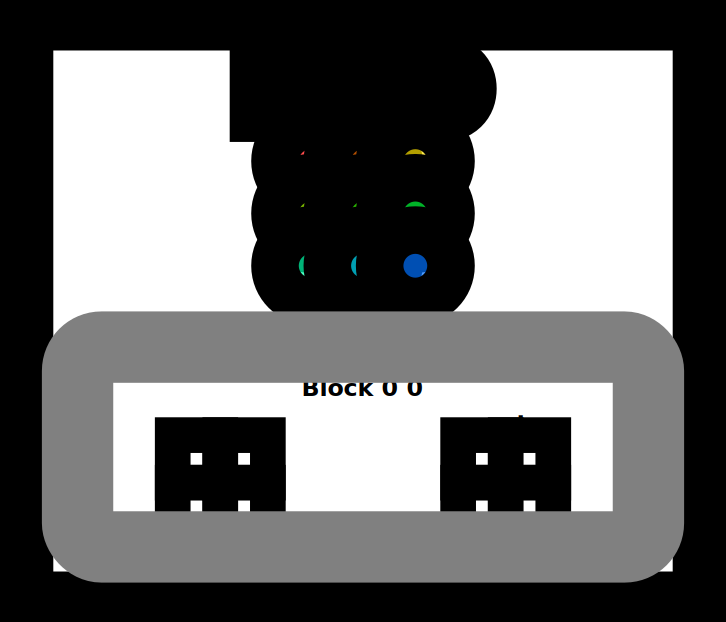

In [16]:
SIZE = 2
out = np.zeros((SIZE, SIZE))
a = np.arange(SIZE * SIZE).reshape((SIZE, SIZE))
problem = CudaProblem(
    "Map 2D", map_2D_test, [a], out, [SIZE], threadsperblock=Coord(3, 3), spec=map_spec
)
problem.show()

In [17]:
problem.check()

Failed Tests.
Yours: [[0. 0.]
 [0. 0.]]
Spec : [[10 11]
 [12 13]]


## Puzzle 5 - Broadcast

Implement a kernel that adds `a` and `b` and stores it in `out`.
Inputs `a` and `b` are vectors. You have more threads than positions.

In [18]:
def broadcast_test(cuda):
    def call(out, a, b, size) -> None:
        local_i = cuda.threadIdx.x
        local_j = cuda.threadIdx.y
        # FILL ME IN (roughly 2 lines)

    return call

# Broadcast
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             0 |             0 |             0 |             0 | 



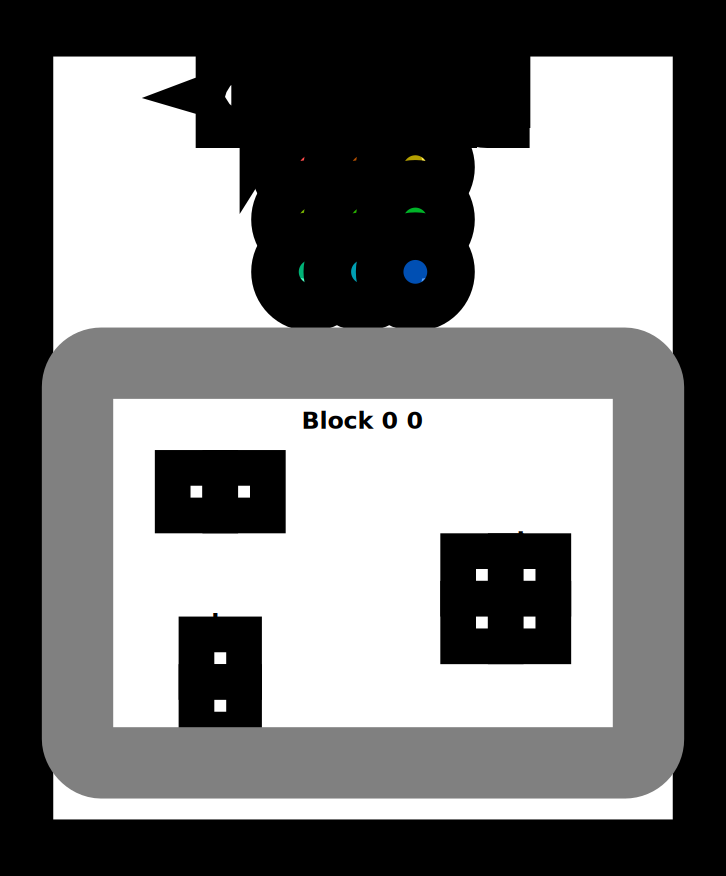

In [19]:
SIZE = 2
out = np.zeros((SIZE, SIZE))
a = np.arange(SIZE).reshape(SIZE, 1)
b = np.arange(SIZE).reshape(1, SIZE)
problem = CudaProblem(
    "Broadcast",
    broadcast_test,
    [a, b],
    out,
    [SIZE],
    threadsperblock=Coord(3, 3),
    spec=zip_spec,
)
problem.show()

In [20]:
problem.check()

Failed Tests.
Yours: [[0. 0.]
 [0. 0.]]
Spec : [[0 1]
 [1 2]]


## Puzzle 6 - Blocks

Implement a kernel that adds 10 to each position of `a` and stores it in `out`.
You have less threads per block than the size of `a`.

*Tip: A block is a group of threads. The number of threads per block is limited, but we can
have many different blocks. Variable `cuda.blockIdx` tells us what block we are in.*

In [21]:
def map_block_test(cuda):
    def call(out, a, size) -> None:
        i = cuda.blockIdx.x * cuda.blockDim.x + cuda.threadIdx.x
        # FILL ME IN (roughly 2 lines)

    return call

# Blocks
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             0 |             0 |             0 |             0 | 



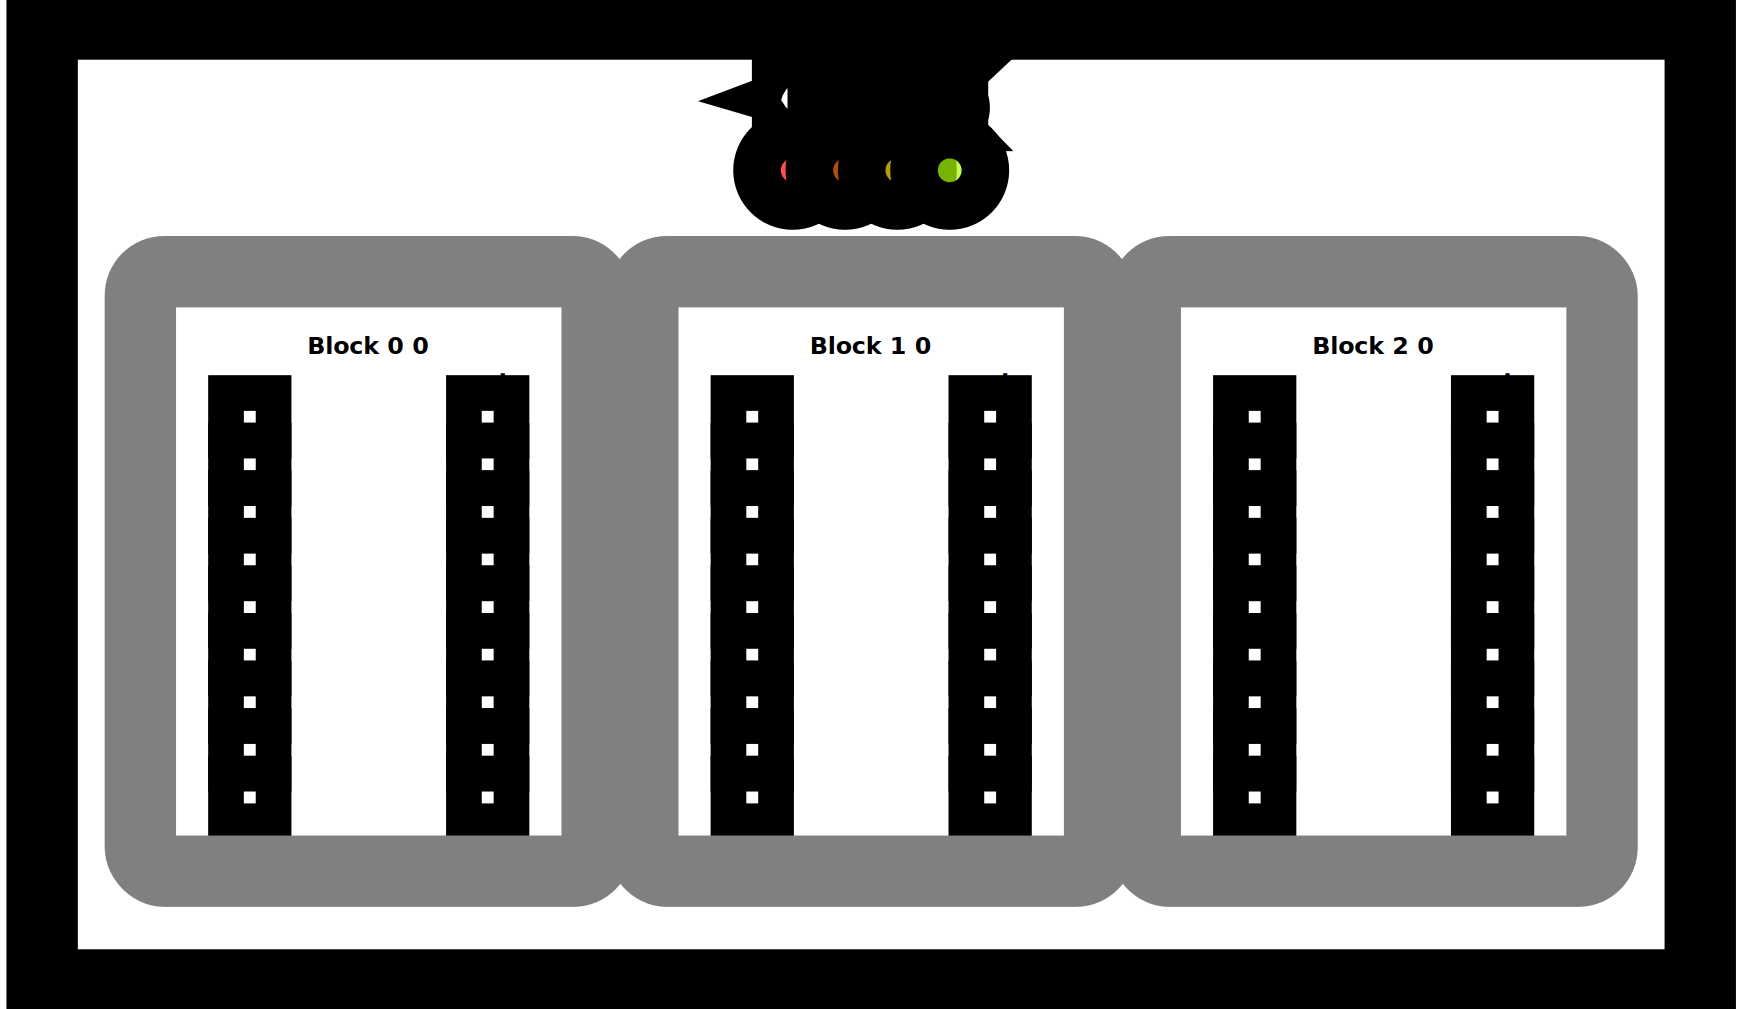

In [22]:
SIZE = 9
out = np.zeros((SIZE,))
a = np.arange(SIZE)
problem = CudaProblem(
    "Blocks",
    map_block_test,
    [a],
    out,
    [SIZE],
    threadsperblock=Coord(4, 1),
    blockspergrid=Coord(3, 1),
    spec=map_spec,
)
problem.show()

In [23]:
problem.check()

Failed Tests.
Yours: [0. 0. 0. 0. 0. 0. 0. 0. 0.]
Spec : [10 11 12 13 14 15 16 17 18]


Puzzle 7 - Blocks 2D

Implement the same kernel in 2D.  You have less threads per block
than the size of `a` in both directions.

In [24]:
def map_block2D_test(cuda):
    def call(out, a, size) -> None:
        i = cuda.blockIdx.x * cuda.blockDim.x + cuda.threadIdx.x
        # FILL ME IN (roughly 4 lines)

    return call

In [25]:
SIZE = 5
out = np.zeros((SIZE, SIZE))
a = np.ones((SIZE, SIZE))

# Blocks 2D
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             0 |             0 |             0 |             0 | 



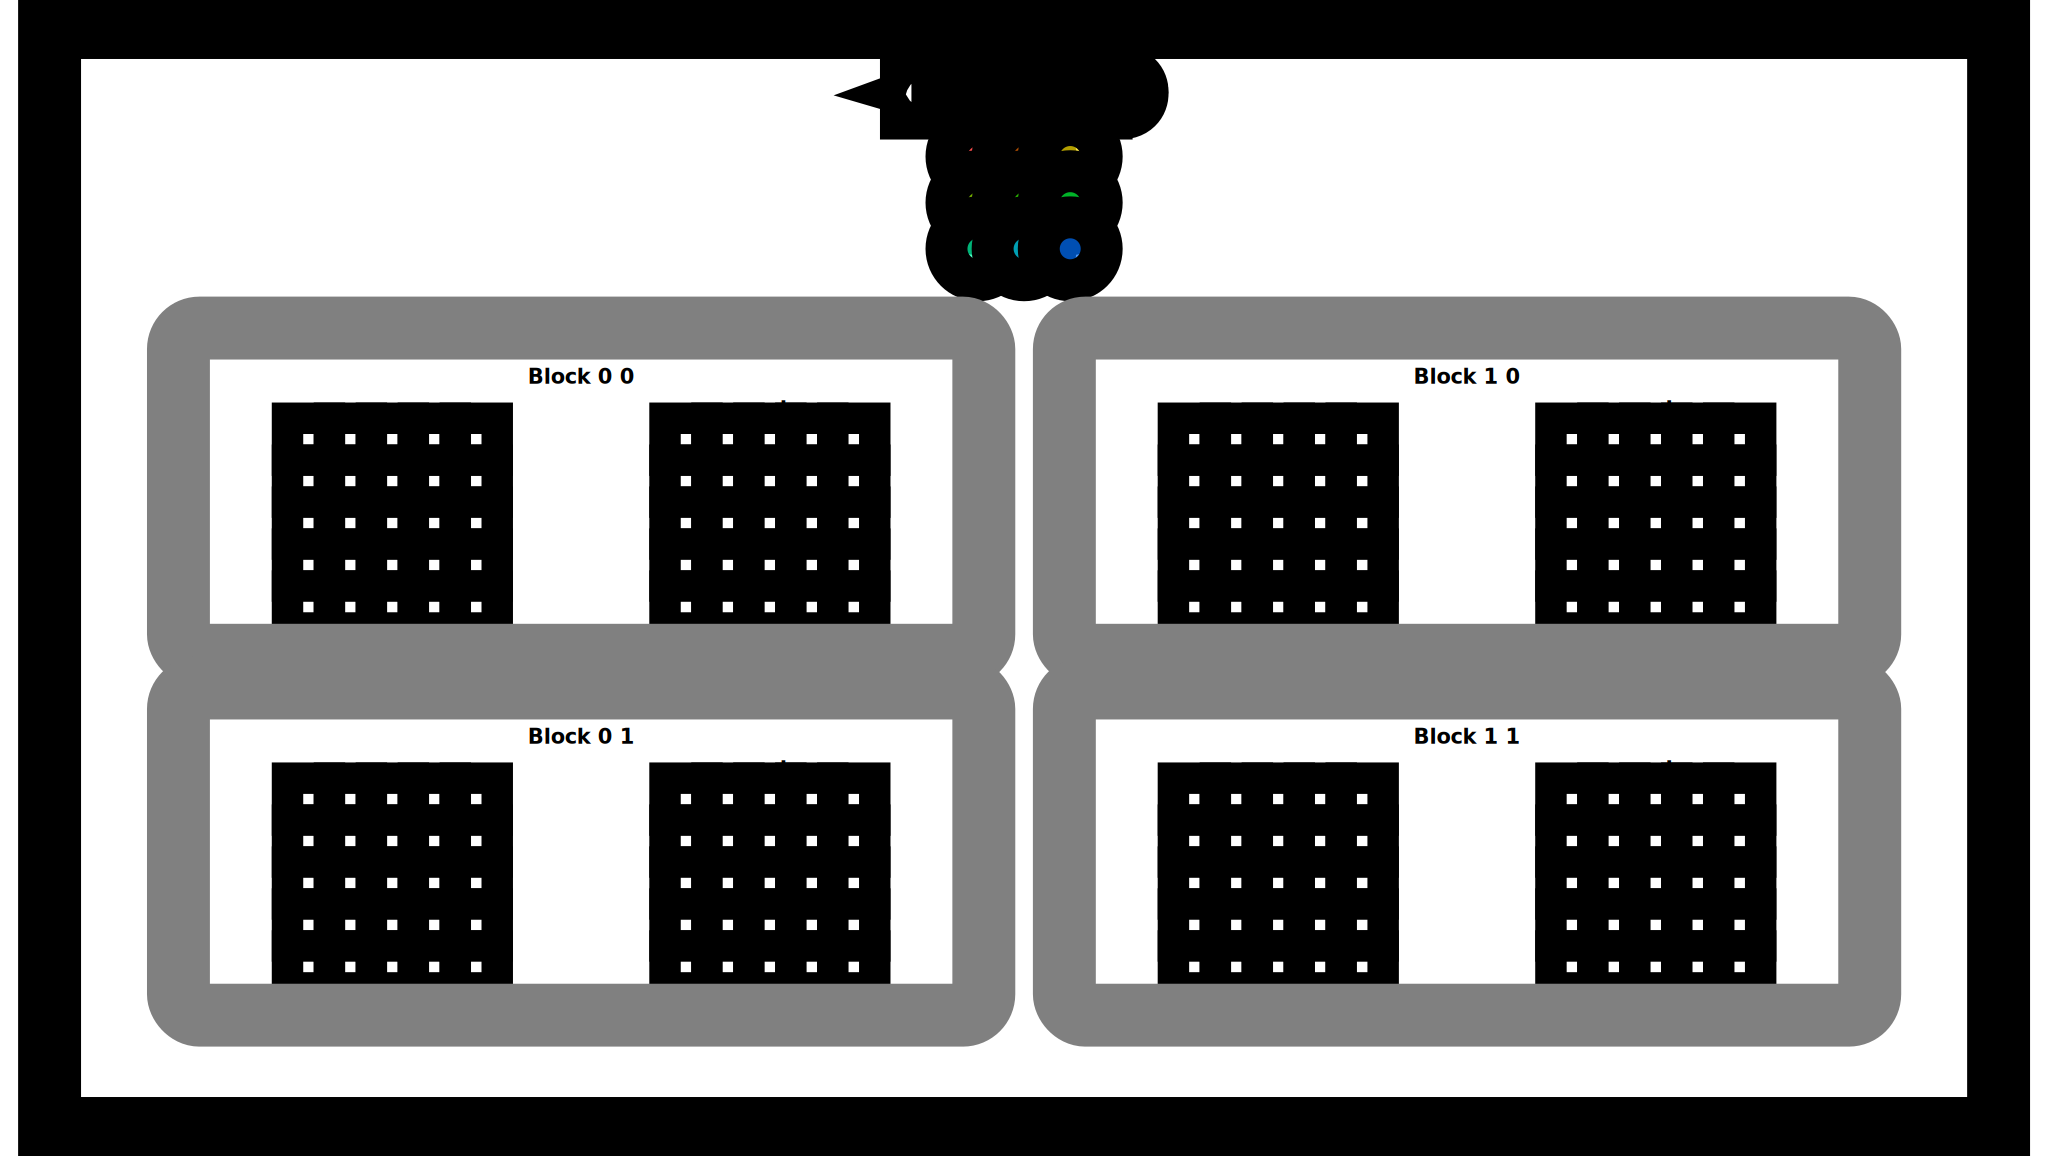

In [26]:
problem = CudaProblem(
    "Blocks 2D",
    map_block2D_test,
    [a],
    out,
    [SIZE],
    threadsperblock=Coord(3, 3),
    blockspergrid=Coord(2, 2),
    spec=map_spec,
)
problem.show()

In [27]:
problem.check()

Failed Tests.
Yours: [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Spec : [[11. 11. 11. 11. 11.]
 [11. 11. 11. 11. 11.]
 [11. 11. 11. 11. 11.]
 [11. 11. 11. 11. 11.]
 [11. 11. 11. 11. 11.]]


Puzzle 8 - Shared

Implement a kernel that adds 10 to each position of `a` and stores it in `out`.
You have less threads per block than the size of `a`.

*Tip: Each block can have a constant amount of shared memory that
only threads in that block can read and write to.
After writing you should use `cuda.syncthreads` to ensure that threads do not cross.*

(This example does not really need shared memory or syncthreads, but it is a demo.)

In [28]:
TPB = 4

In [29]:
def shared_test(cuda):
    def call(out, a, size) -> None:
        shared = cuda.shared.array(TPB, numba.float32)
        i = cuda.blockIdx.x * cuda.blockDim.x + cuda.threadIdx.x
        local_i = cuda.threadIdx.x

        if i < size:
            shared[local_i] = a[i]
            cuda.syncthreads()

        # FILL ME IN (roughly 2 lines)

    return call

# Shared
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             1 |             0 |             0 |             1 | 



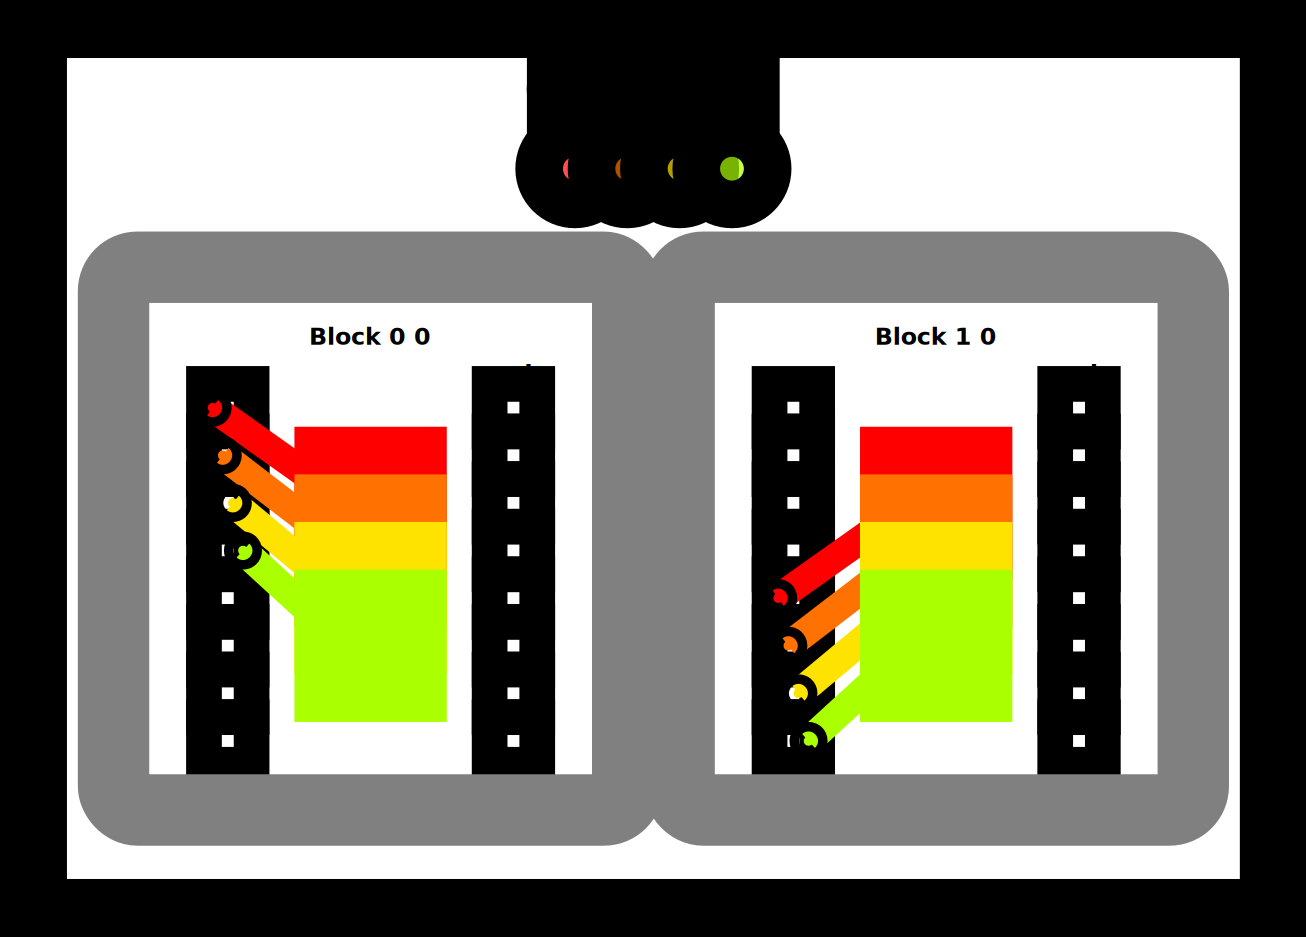

In [30]:
SIZE = 8
out = np.zeros(SIZE)
a = np.ones(SIZE)
problem = CudaProblem(
    "Shared",
    shared_test,
    [a],
    out,
    [SIZE],
    threadsperblock=Coord(TPB, 1),
    blockspergrid=Coord(2, 1),
    spec=map_spec,
)
problem.show()

In [31]:
problem.check()

Failed Tests.
Yours: [0. 0. 0. 0. 0. 0. 0. 0.]
Spec : [11. 11. 11. 11. 11. 11. 11. 11.]


## Puzzle 9 - Pooling

Implement a kernel that sums together the last 3 position of `a` and stores it in `out`.
You have 1 thread per position. You only need 1 global read and 1 global write per thread.

In [32]:
def pool_spec(a):
    out = np.zeros(*a.shape)
    for i in range(a.shape[0]):
        out[i] = a[max(i - 2, 0) : i + 1].sum()
    return out

In [33]:
TPB = 8

In [34]:
def pool_test(cuda):
    def call(out, a, size) -> None:
        shared = cuda.shared.array(TPB, numba.float32)
        i = cuda.blockIdx.x * cuda.blockDim.x + cuda.threadIdx.x
        local_i = cuda.threadIdx.x
        # FILL ME IN (roughly 8 lines)

    return call

# Pooling
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             0 |             0 |             0 |             0 | 



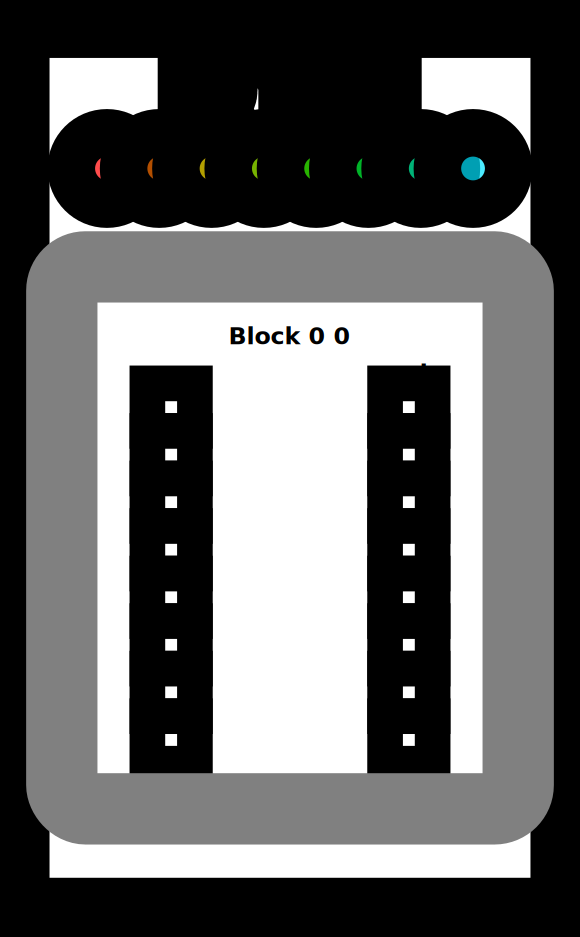

In [35]:
SIZE = 8
out = np.zeros(SIZE)
a = np.arange(SIZE)
problem = CudaProblem(
    "Pooling",
    pool_test,
    [a],
    out,
    [SIZE],
    threadsperblock=Coord(TPB, 1),
    blockspergrid=Coord(1, 1),
    spec=pool_spec,
)
problem.show()

In [36]:
problem.check()

Failed Tests.
Yours: [0. 0. 0. 0. 0. 0. 0. 0.]
Spec : [ 0.  1.  3.  6.  9. 12. 15. 18.]


## Puzzle 10 - Dot Product

Implement a kernel that computes the dot-product of `a` and `b` and stores it in `out`.
You have 1 thread per position. You only need 1 global read and 1 global write per thread.

In [37]:
def dot_spec(a, b):
    return a @ b

In [38]:
TPB = 8

In [39]:
def dot_test(cuda):
    def call(out, a, b, size) -> None:
        a_shared = cuda.shared.array(TPB, numba.float32)
        b_shared = cuda.shared.array(TPB, numba.float32)

        i = cuda.blockIdx.x * cuda.blockDim.x + cuda.threadIdx.x
        local_i = cuda.threadIdx.x
        # FILL ME IN (roughly 9 lines)

    return call

# Dot
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             0 |             0 |             0 |             0 | 



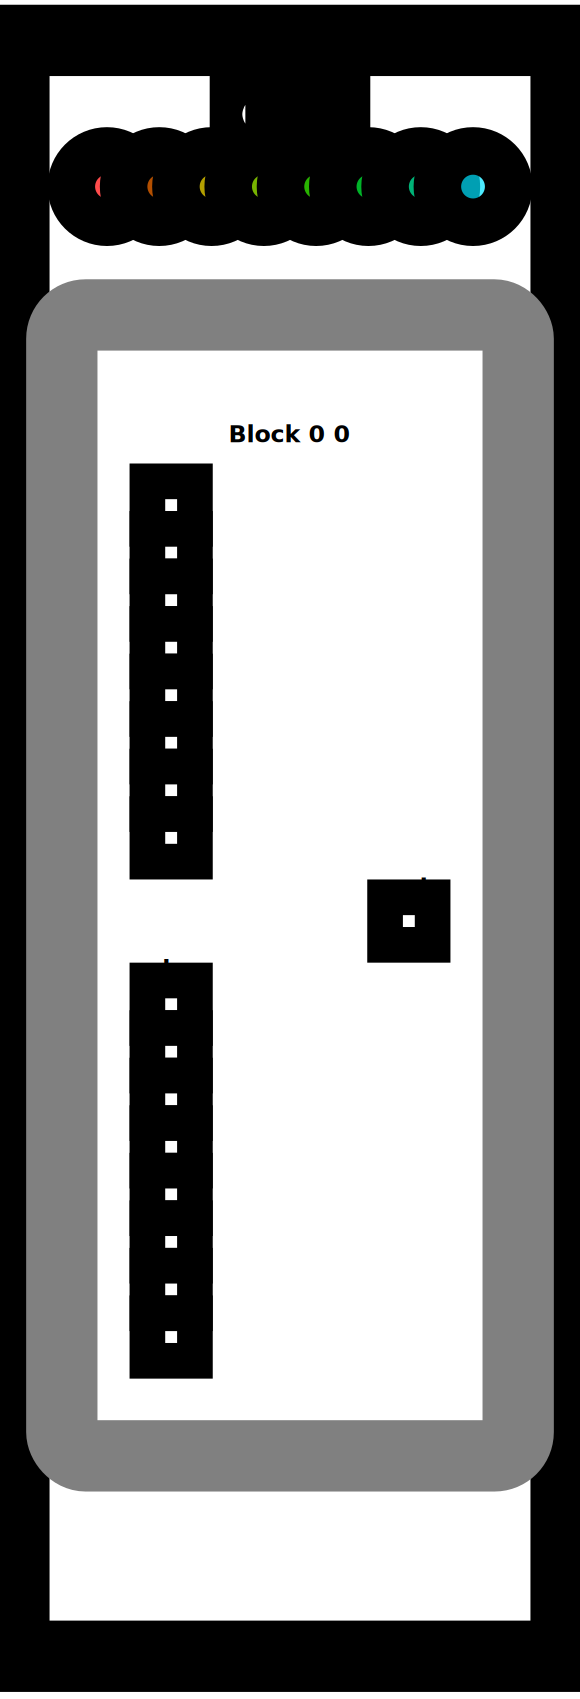

In [40]:
SIZE = 8
out = np.zeros(1)
a = np.arange(SIZE)
b = np.arange(SIZE)
problem = CudaProblem(
    "Dot",
    dot_test,
    [a, b],
    out,
    [SIZE],
    threadsperblock=Coord(SIZE, 1),
    blockspergrid=Coord(1, 1),
    spec=dot_spec,
)
problem.show()

In [41]:
problem.check()

Failed Tests.
Yours: [0.]
Spec : 140


## Puzzle 11 - 1D Convolution

Implement a kernel that computes a 1D convolution between `a` and `b` and stores it in `out`.
You need to handle the general case. You only need 2 global reads and 1 global write per thread.

In [42]:
def conv_spec(a, b):
    out = np.zeros(*a.shape)
    len = b.shape[0]
    for i in range(a.shape[0]):
        out[i] = sum([a[i + j] * b[j] for j in range(len) if i + j < a.shape[0]])
    return out

In [43]:
MAX_CONV = 5
TPB = 8
TPB_MAX_CONV = TPB + MAX_CONV

In [44]:
def conv_test(cuda):
    def call(out, a, b, a_size, b_size) -> None:
        i = cuda.blockIdx.x * cuda.blockDim.x + cuda.threadIdx.x
        local_i = cuda.threadIdx.x

        # FILL ME IN (roughly 17 lines)

    return call

Test 1

# 1D Conv (Simple)
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             0 |             0 |             0 |             0 | 



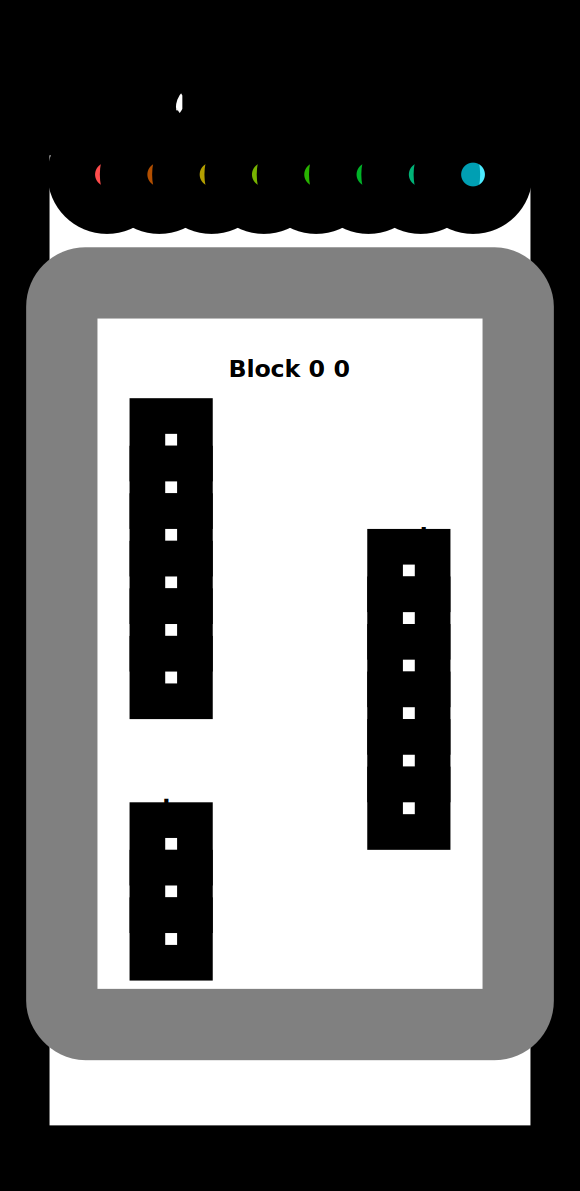

In [45]:
SIZE = 6
CONV = 3
out = np.zeros(SIZE)
a = np.arange(SIZE)
b = np.arange(CONV)
problem = CudaProblem(
    "1D Conv (Simple)",
    conv_test,
    [a, b],
    out,
    [SIZE, CONV],
    Coord(1, 1),
    Coord(TPB, 1),
    spec=conv_spec,
)
problem.show()

In [46]:
problem.check()

Failed Tests.
Yours: [0. 0. 0. 0. 0. 0.]
Spec : [ 5.  8. 11. 14.  5.  0.]


Test 2

# 1D Conv (Full)
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             0 |             0 |             0 |             0 | 



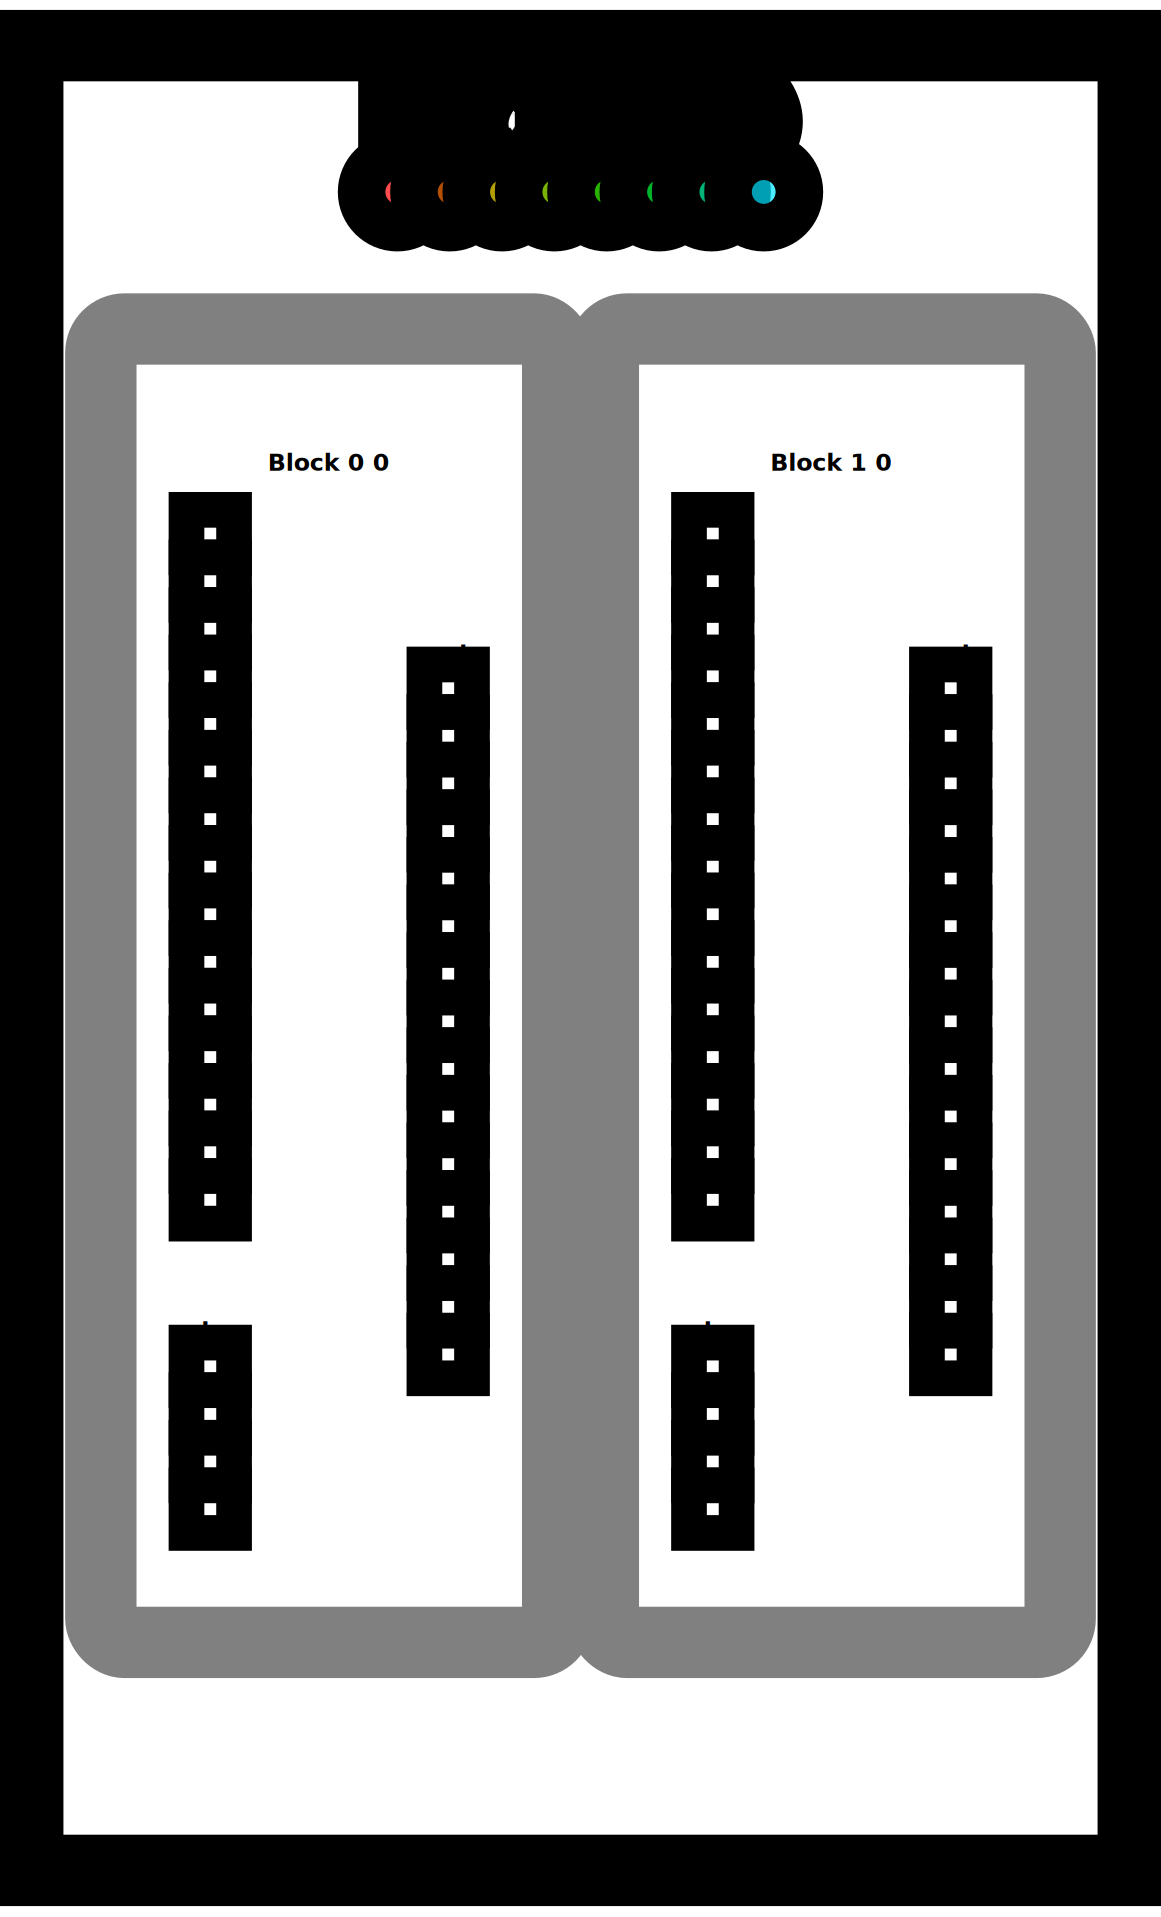

In [47]:
out = np.zeros(15)
a = np.arange(15)
b = np.arange(4)
problem = CudaProblem(
    "1D Conv (Full)",
    conv_test,
    [a, b],
    out,
    [15, 4],
    Coord(2, 1),
    Coord(TPB, 1),
    spec=conv_spec,
)
problem.show()

In [48]:
problem.check()

Failed Tests.
Yours: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Spec : [14. 20. 26. 32. 38. 44. 50. 56. 62. 68. 74. 80. 41. 14.  0.]


## Puzzle 12 - Prefix Sum

Implement a kernel that computes a sum over `a` and stores it in `out`.
If the size of `a` is greater than the block size, only store the sum of
each block.

We will do this, using the *parallel prefix sum* algorithm in shared memory.
That is each step of the algorithm should sum together half the remaining numbers.
Follow the top half of this diagram.

![](https://en.wikipedia.org/wiki/Prefix_sum#/media/File:Prefix_sum_16.svg)

In [49]:
TPB = 8

In [50]:
def sum_spec(a):
    out = np.zeros((a.shape[0] + TPB - 1) // TPB)
    for j, i in enumerate(range(0, a.shape[-1], TPB)):
        out[j] = a[i : i + TPB].sum()
    return out

In [51]:
def sum_test(cuda):
    def call(out, a, size: int) -> None:
        cache = cuda.shared.array(TPB, numba.float32)
        i = cuda.blockIdx.x * cuda.blockDim.x + cuda.threadIdx.x
        local_i = cuda.threadIdx.x
        # FILL ME IN (roughly 12 lines)

    return call

Test 1

# Sum (Simple)
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             0 |             0 |             0 |             0 | 



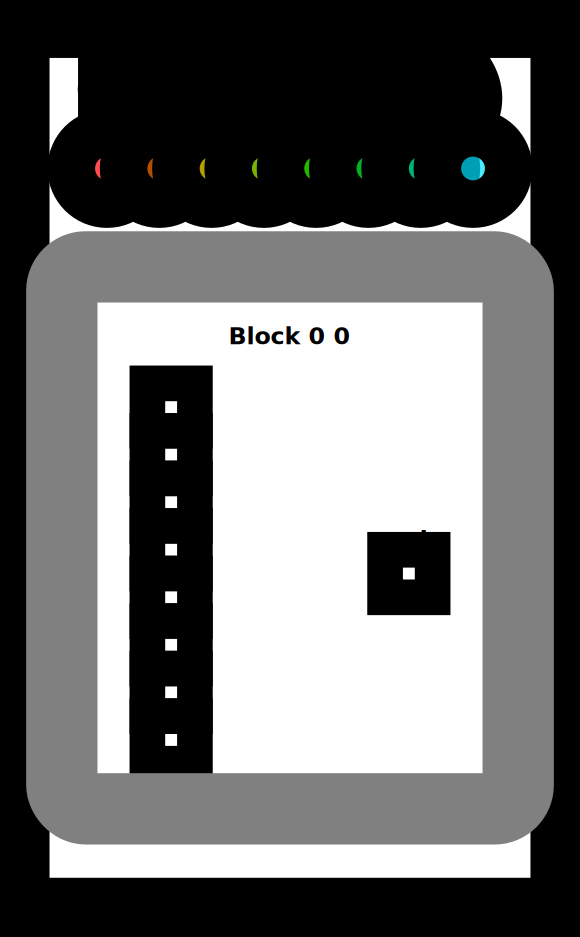

In [52]:
SIZE = 8
out = np.zeros(1)
inp = np.arange(SIZE)
problem = CudaProblem(
    "Sum (Simple)",
    sum_test,
    [inp],
    out,
    [SIZE],
    Coord(1, 1),
    Coord(TPB, 1),
    spec=sum_spec,
)
problem.show()

In [53]:
problem.check()

Failed Tests.
Yours: [0.]
Spec : [28.]


Test 2

# Sum (Full)
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             0 |             0 |             0 |             0 | 



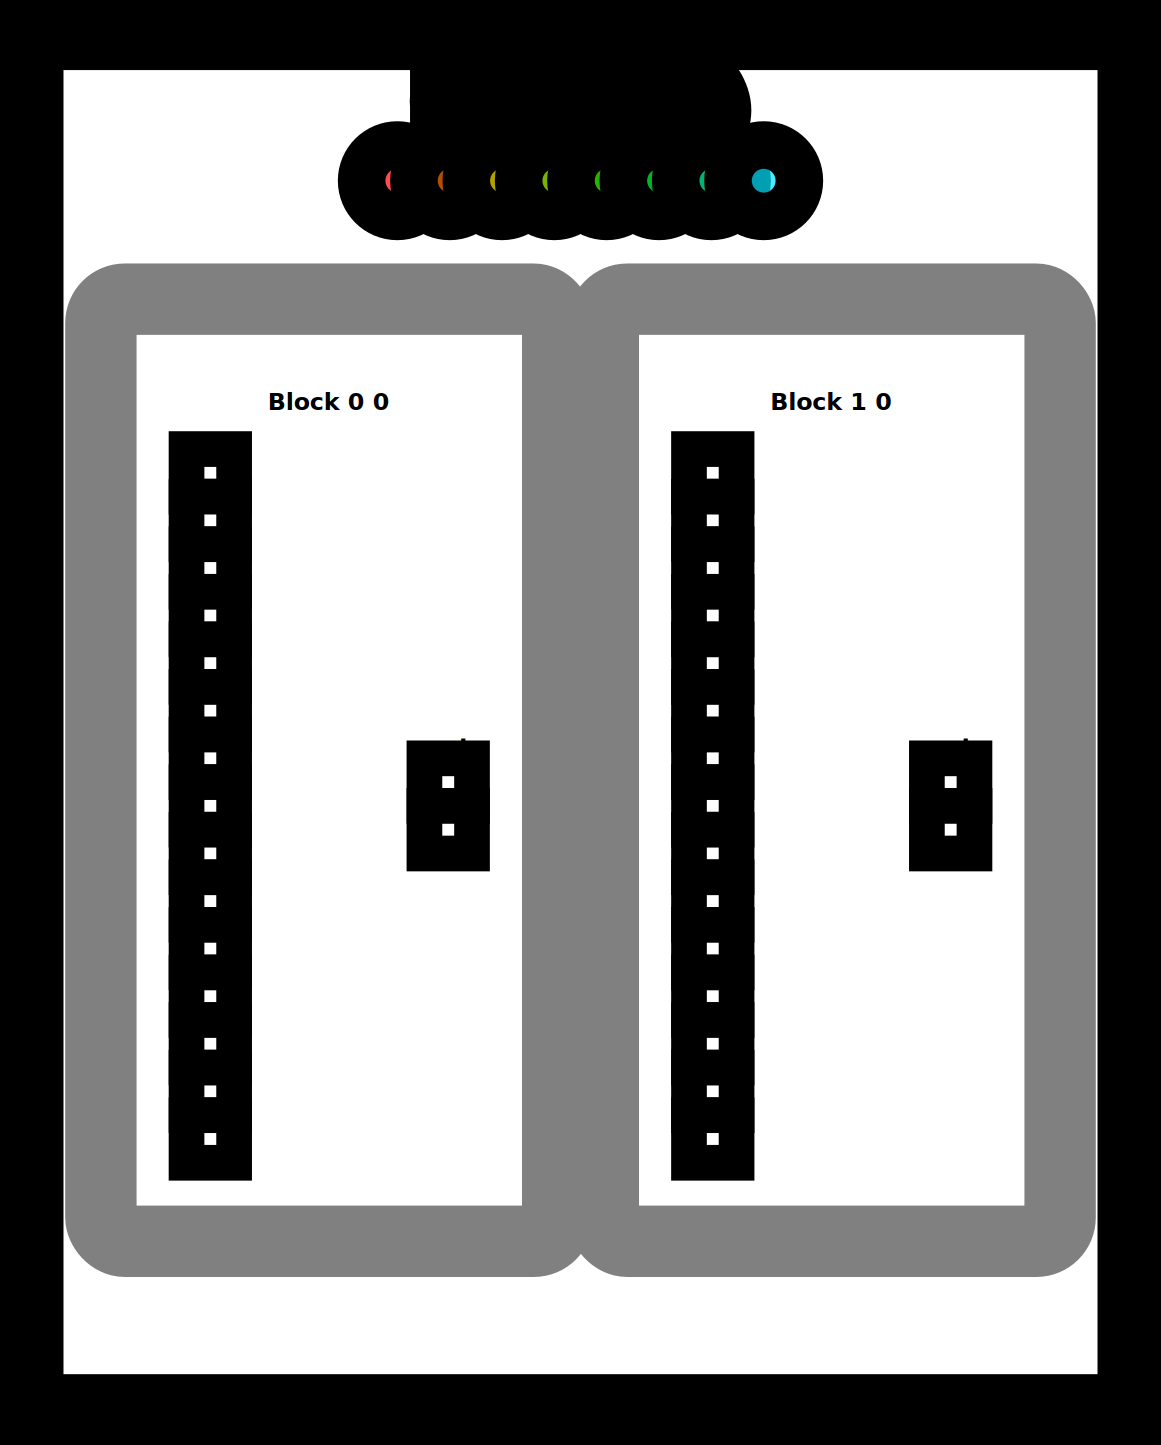

In [54]:
SIZE = 15
out = np.zeros(2)
inp = np.arange(SIZE)
problem = CudaProblem(
    "Sum (Full)",
    sum_test,
    [inp],
    out,
    [SIZE],
    Coord(2, 1),
    Coord(TPB, 1),
    spec=sum_spec,
)
problem.show()

In [55]:
problem.check()

Failed Tests.
Yours: [0. 0.]
Spec : [28. 77.]


## Puzzle 13 - Axis Sum

Implement a kernel that computes a sum over each row of `a` and stores it in `out`.

In [56]:
TPB = 8

In [57]:
def sum_spec(a):
    out = np.zeros((a.shape[0], (a.shape[1] + TPB - 1) // TPB))
    for j, i in enumerate(range(0, a.shape[-1], TPB)):
        out[..., j] = a[..., i : i + TPB].sum(-1)
    return out

In [58]:
def axis_sum_test(cuda):
    def call(out, a, size: int) -> None:
        cache = cuda.shared.array(TPB, numba.float32)
        i = cuda.blockIdx.x * cuda.blockDim.x + cuda.threadIdx.x
        local_i = cuda.threadIdx.x
        batch = cuda.blockIdx.y
        # FILL ME IN (roughly 12 lines)

    return call

# Axis Sum
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             0 |             0 |             0 |             0 | 



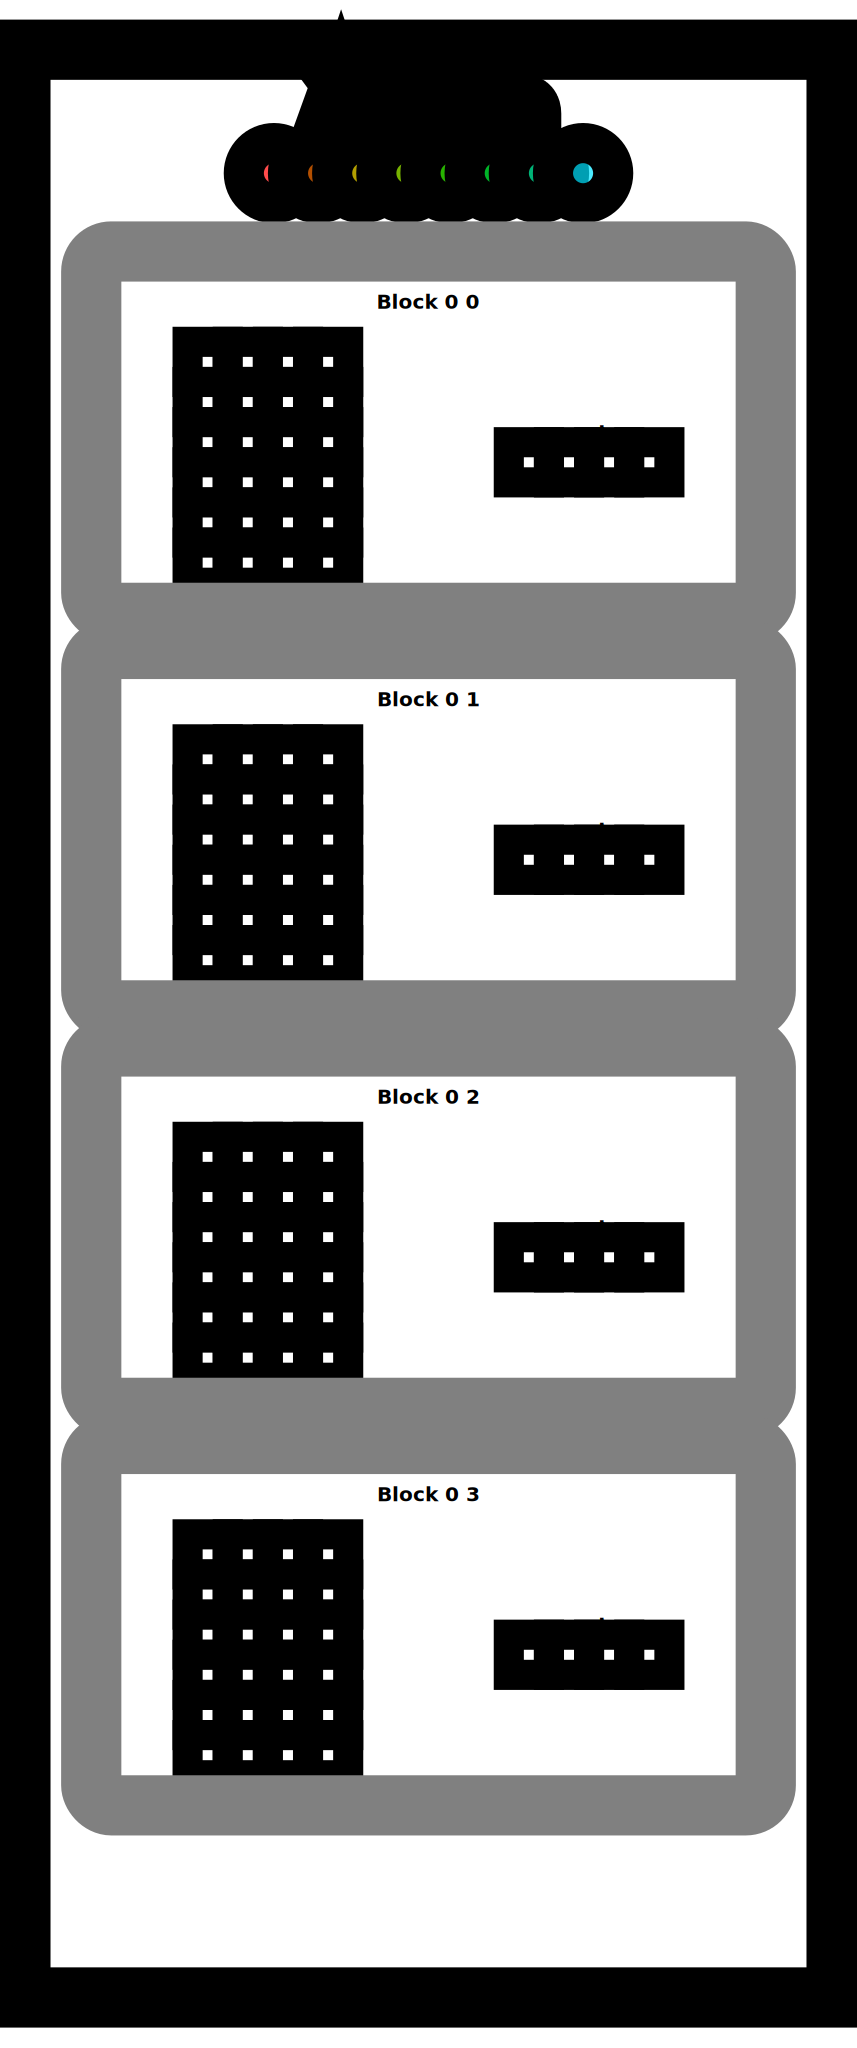

In [59]:
BATCH = 4
SIZE = 6
out = np.zeros((BATCH, 1))
inp = np.arange(BATCH * SIZE).reshape((BATCH, SIZE))
problem = CudaProblem(
    "Axis Sum",
    axis_sum_test,
    [inp],
    out,
    [SIZE],
    Coord(1, BATCH),
    Coord(TPB, 1),
    spec=sum_spec,
)
problem.show()

In [60]:
problem.check()

Failed Tests.
Yours: [[0.]
 [0.]
 [0.]
 [0.]]
Spec : [[ 15.]
 [ 51.]
 [ 87.]
 [123.]]


## Puzzle 14 - Matrix Multiply!

Implement a kernel that multiplies square matrices `a` and `b` and
stores it in `out`.

*Tip: The most efficient algorithm here will copy a block into
 shared memory before computing each of the individual row-column
 dot products. This is easy to do if the matrix fits in shared
 memory.  Do that case first. Then update your code so that compute
 a partial dot-product and then iteratively move the part that you
 copied into shared memory.* You should be able to do the hard case
 in 6 global reads.

In [61]:
def matmul_spec(a, b):
    return a @ b

In [62]:
TPB = 3

In [63]:
def mm_oneblock_test(cuda):
    def call(out, a, b, size: int) -> None:
        a_shared = cuda.shared.array((TPB, TPB), numba.float32)
        b_shared = cuda.shared.array((TPB, TPB), numba.float32)

        i = cuda.blockIdx.x * cuda.blockDim.x + cuda.threadIdx.x
        j = cuda.blockIdx.y * cuda.blockDim.y + cuda.threadIdx.y
        local_i = cuda.threadIdx.x
        local_j = cuda.threadIdx.y
        # FILL ME IN (roughly 14 lines)

    return call

Test 1

In [64]:
SIZE = 2
out = np.zeros((SIZE, SIZE))
inp1 = np.arange(SIZE * SIZE).reshape((SIZE, SIZE))
inp2 = np.arange(SIZE * SIZE).reshape((SIZE, SIZE)).T

# Matmul (Simple)
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             0 |             0 |             0 |             0 | 



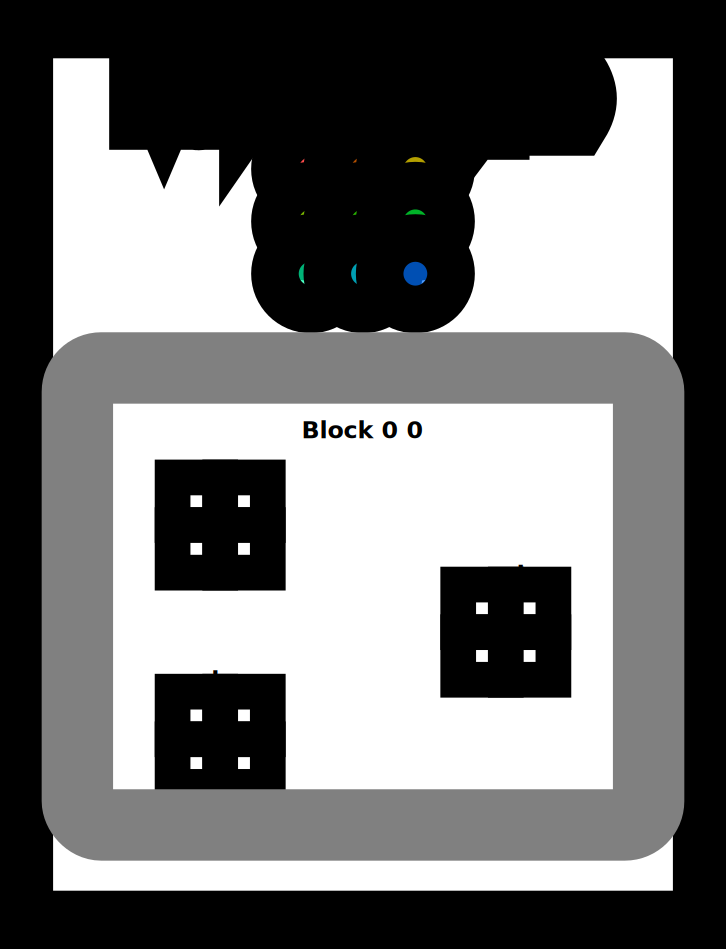

In [65]:
problem = CudaProblem(
    "Matmul (Simple)",
    mm_oneblock_test,
    [inp1, inp2],
    out,
    [SIZE],
    Coord(1, 1),
    Coord(TPB, TPB),
    spec=matmul_spec,
)
problem.show(sparse=True)

In [66]:
problem.check()

Failed Tests.
Yours: [[0. 0.]
 [0. 0.]]
Spec : [[ 1  3]
 [ 3 13]]


In [67]:
# Test 2
SIZE = 8
out = np.zeros((SIZE, SIZE))
inp1 = np.arange(SIZE * SIZE).reshape((SIZE, SIZE))
inp2 = np.arange(SIZE * SIZE).reshape((SIZE, SIZE)).T

# Matmul (Full)
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             0 |             0 |             0 |             0 | 



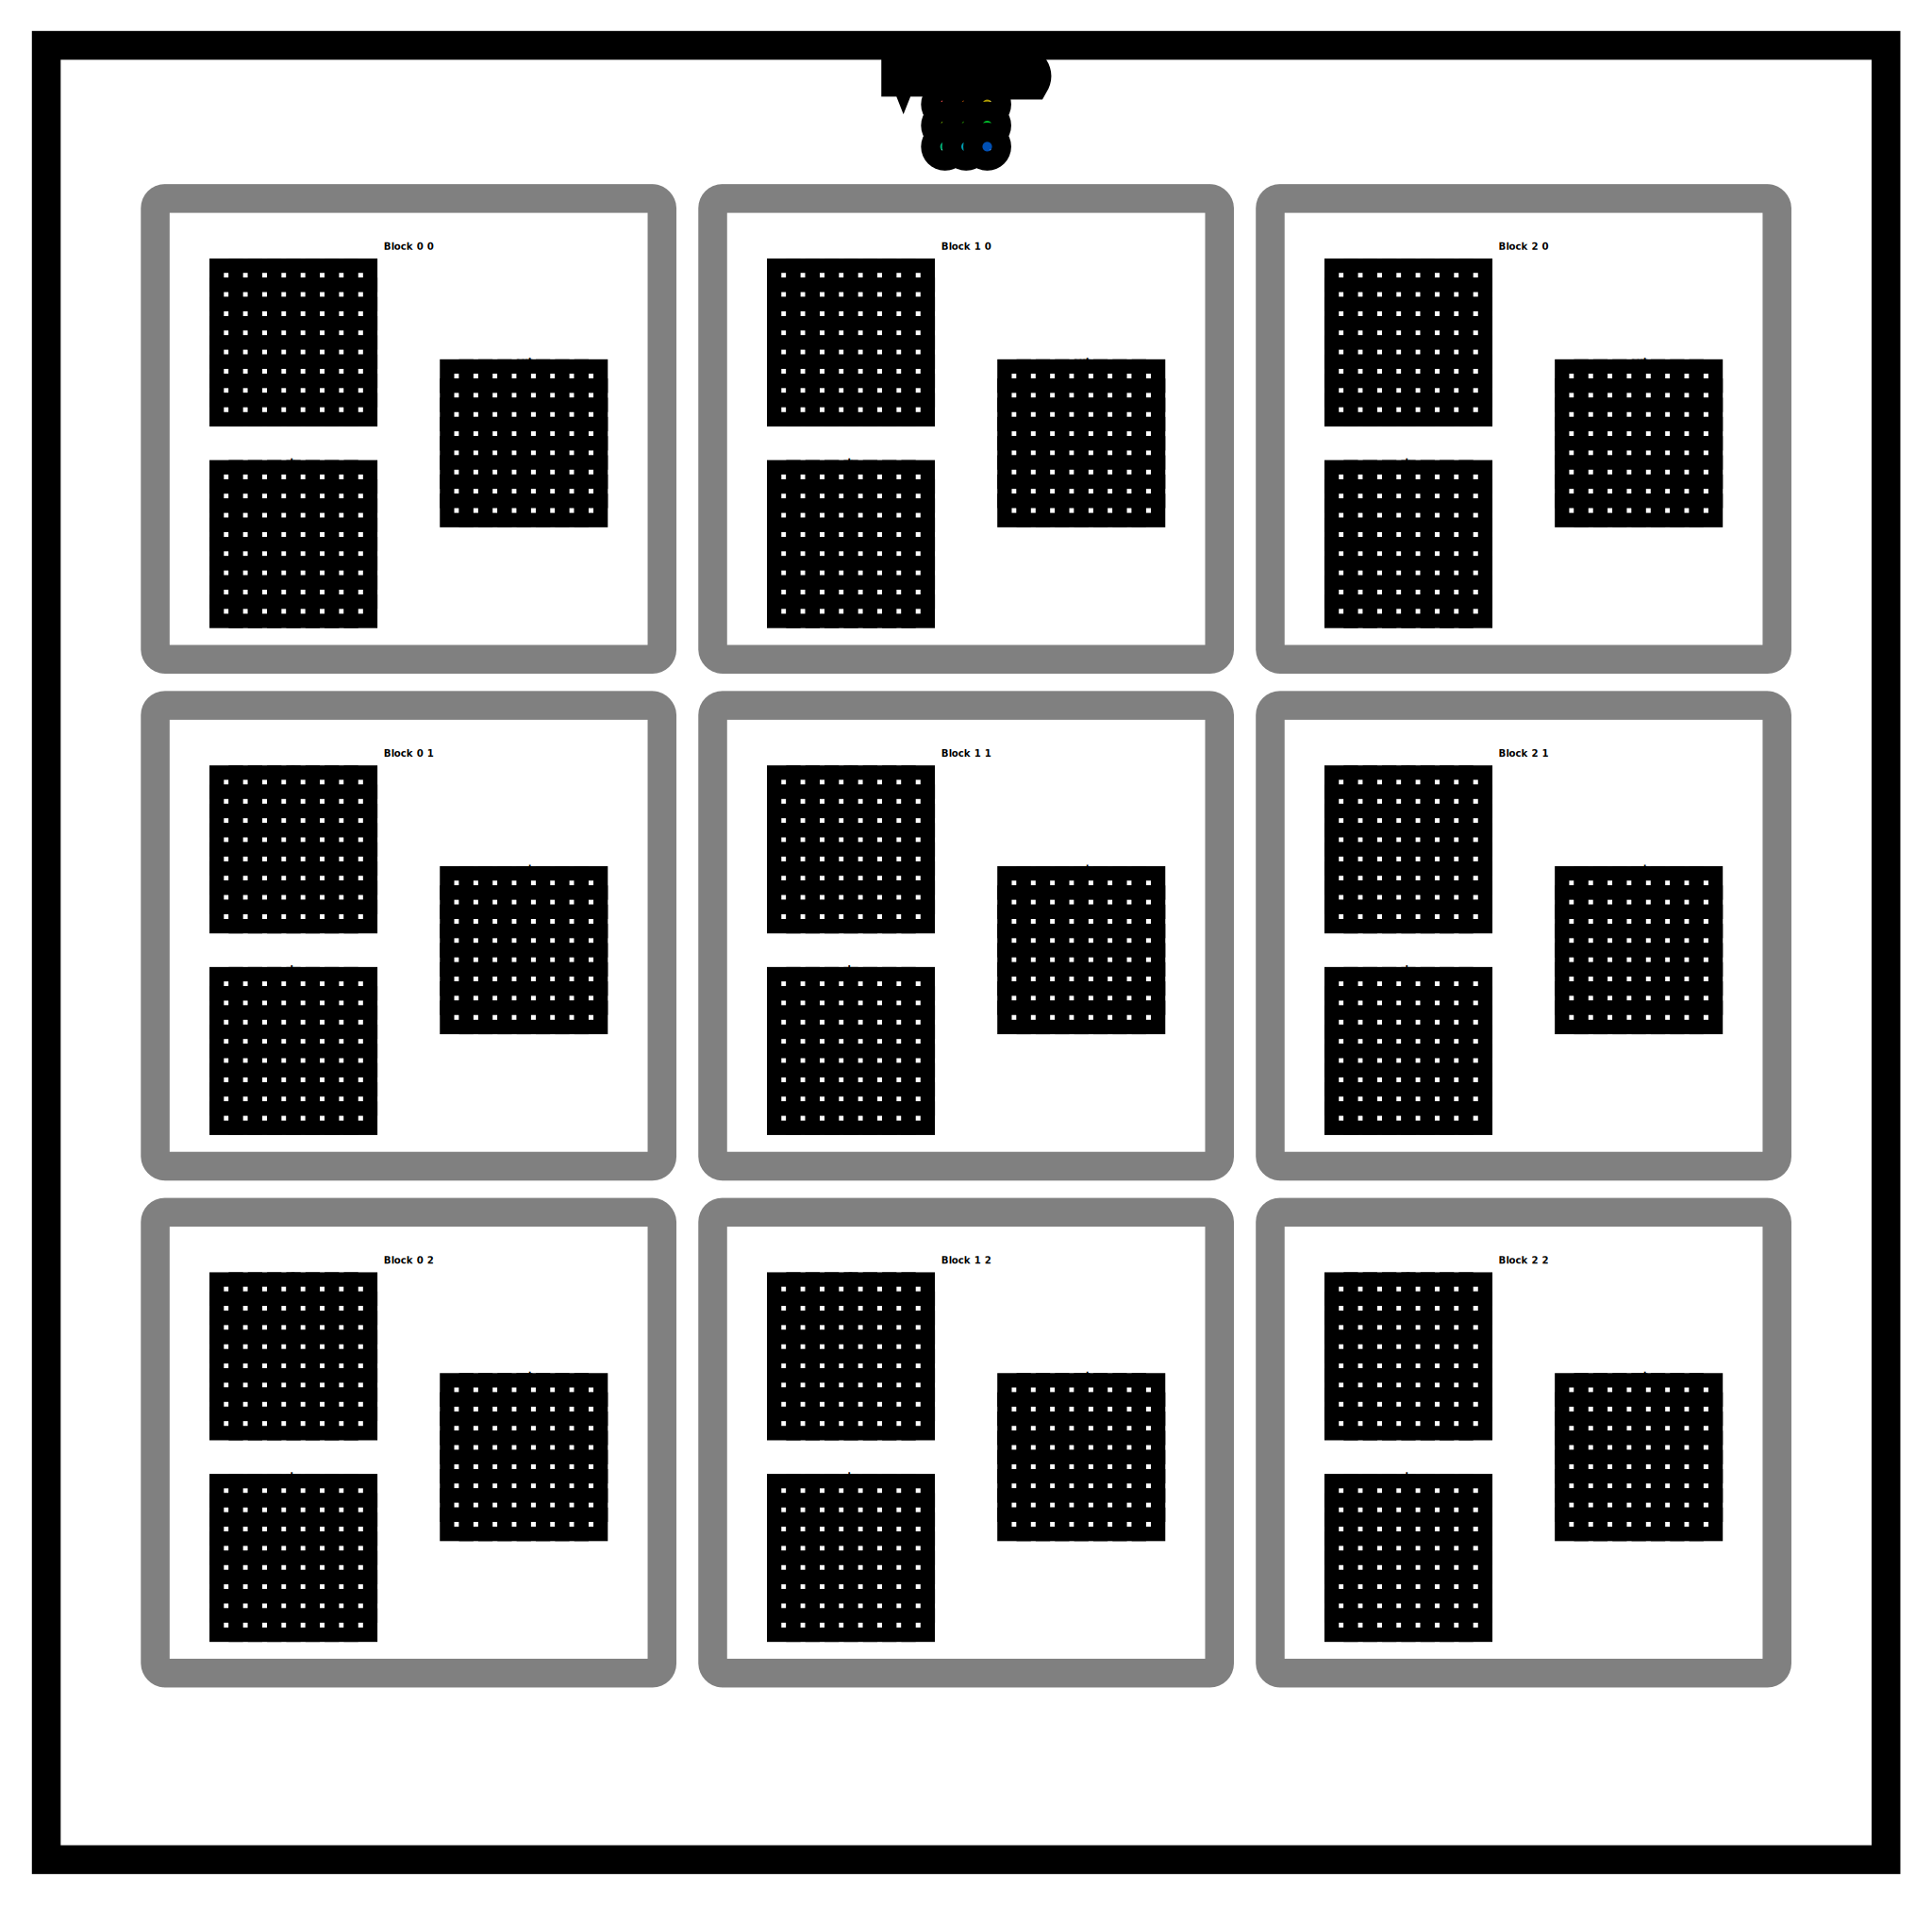

In [68]:
problem = CudaProblem(
    "Matmul (Full)",
    mm_oneblock_test,
    [inp1, inp2],
    out,
    [SIZE],
    Coord(3, 3),
    Coord(TPB, TPB),
    spec=matmul_spec,
)
problem.show(sparse=True)

In [69]:
problem.check()

Failed Tests.
Yours: [[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
Spec : [[  140   364   588   812  1036  1260  1484  1708]
 [  364  1100  1836  2572  3308  4044  4780  5516]
 [  588  1836  3084  4332  5580  6828  8076  9324]
 [  812  2572  4332  6092  7852  9612 11372 13132]
 [ 1036  3308  5580  7852 10124 12396 14668 16940]
 [ 1260  4044  6828  9612 12396 15180 17964 20748]
 [ 1484  4780  8076 11372 14668 17964 21260 24556]
 [ 1708  5516  9324 13132 16940 20748 24556 28364]]
